<a href="https://colab.research.google.com/github/ostannushka/bric-a-brac/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questions and Guidelines

For analysis, you can use the last five years from available data, i.e. January 2014 - December 2018. Please provide answers to the following questions:

    What is the average delay time?
    What is the median time delay? What can you conclude when you compare mean delay with median delay?
    Calculate skewness and kurtosis of time delay. What conclusion can you draw from this?
    Which theoretical distribution would you fit the time delay? Why
    Calculate average delay time and median delay time per:
        Year
        Quarter of year
        Month of year
        Week of year
        Day of week
        Carrier
        Origin
        Destination

Elaborate on results and give some useful insights. Provide conclusions.

     How would you quantify and identify the main factors impacting delay? You are free to propose/build any model or analysis you find appropriate.
    Bonus: you are encouraged to perform analysis/modeling of your own choice, present the importance of that analysis and provide insights.

You are free to use any programming language (Python, R, Matlab, C, C++, etc.).  Your answers and analysis should be prepared in PowerPoint and sent in pdf format. Your ppt file should not exceed 10 pages/slides! Please provide codes as well. Be sure to have titles, labels, axis, and units on the diagrams and tables you provide.

### Data preparing

In [ ]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datasets importcsv
df1 = pd.read_csv('/content/drive/MyDrive/aeroplanes/2014.csv')

There are 27 columns for the dataset and corresponding column description are given below.
1.       FL_DATE                                         flight date

2.       OP_CARRIER                                 carrier (string)

3.       OP_CARRIER_FL_NUM                carrier flight number  (integer)

4.       ORIGIN                                           origin (string)

5.       DEST                                               destination (string)

6.       CRS_DEP_TIME                             planned departure time (hhmm as integer)

7.       DEP_TIME                                      actual departure time

8.       DEP_DELAY                                   departure delay in minutes

9.       TAXI_OUT                                      taxi out time in minutes

10.   WHEELS_OFF                                wheels off (hhmm)

11.   WHEELS_ON                                 wheels on (hhmm)

12.   TAXI_IN                                          taxi out time in minutes

13.   CRS_ARR_TIME                            planned arrival time (hhmm)

14.   ARR_TIME                                     actual arrival time

15.   ARR_DELAY                                   time delay in minutes

16.   CANCELLED                                   was the flight canceled

17.   CANCELLATION_CODE                reason for cancellation

18.   DIVERTED                                      was the flight diverted

19.   CRS_ELAPSED_TIME                    planned elapsed time in minutes

20.   ACTUAL_ELAPSED_TIME            actual elapsed time in minutes

21.   AIR_TIME                                       time spent in flight in minutes

22.   DISTANCE                                      distance in miles

23.   CARRIER_DELAY                           delay occurred due to carrier in minutes

24.   WEATHER_DELAY                        delay due to extreme weather conditions in minutes

25.   NAS_DELAY                                   delay due to National Aviation System in minutes

26.   SECURITY_DELAY                         security delay in minutes

27.   LATE_AIRCRAFT_DELAY              previous flights caused delays (in minutes)

ARR_DELAY - target feature


In [ ]:
#we are interested only in delayed flights
def only_delayed(df):
    df_del = df.loc[(df['ARR_DELAY'] > 0)]
    columns_needed = ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'ARR_DELAY']   
    df_del = df_del[columns_needed]
    return df_del

delayed = only_delayed(df1)
delayed

,FL_DATE,OP_CARRIER,ORIGIN,DEST,ARR_DELAY
0,2014-01-01,AA,ICT,DFW,2.0
3,2014-01-01,EV,CRW,DFW,65.0
4,2014-01-01,EV,DFW,CRW,70.0
5,2014-01-01,EV,AMA,DFW,23.0
6,2014-01-01,EV,DFW,AMA,3.0
...,...,...,...,...,...
5819800,2014-12-31,MQ,DFW,LIT,28.0
5819801,2014-12-31,MQ,LIT,DFW,46.0
5819805,2014-12-31,MQ,ORF,MIA,4.0
5819807,2014-12-31,MQ,CMH,ORD,52.0


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/aeroplanes/2015.csv')
delayed = pd.concat([delayed, only_delayed(df2)], ignore_index=True)
# we use concatenation just after opening for memory economy

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/aeroplanes/2016.csv')
delayed = pd.concat([delayed, only_delayed(df3)], ignore_index=True)

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/aeroplanes/2017.csv')
delayed = pd.concat([delayed, only_delayed(df4)], ignore_index=True)
delayed.shape

(8301959, 5)

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/aeroplanes/2018.csv')
delayed = pd.concat([delayed, only_delayed(df5)], ignore_index=True)
delayed.shape

(10818009, 5)

We will try to keep original dataset, because it's needed for machine learning part

In [ ]:
delayed

,FL_DATE,OP_CARRIER,ORIGIN,DEST,ARR_DELAY
0,2014-01-01,AA,ICT,DFW,2.0
1,2014-01-01,EV,CRW,DFW,65.0
2,2014-01-01,EV,DFW,CRW,70.0
3,2014-01-01,EV,AMA,DFW,23.0
4,2014-01-01,EV,DFW,AMA,3.0
...,...,...,...,...,...
10818004,2018-12-31,AA,CLT,TPA,9.0
10818005,2018-12-31,AA,DFW,PHL,9.0
10818006,2018-12-31,AA,CLT,DFW,1.0
10818007,2018-12-31,AA,CLT,MEM,11.0


In [ ]:
def count_missing(df): # count missings in columns
    nan = df.isnull().sum().sort_values(ascending=False) 
    missing_val = nan[nan > 0]
    return missing_val

print(count_missing(delayed))

Series([], dtype: int64)


In [ ]:
delayed['FL_DATE'] = pd.to_datetime(delayed['FL_DATE'], format='%Y-%m-%d')
delayed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10818009 entries, 0 to 10818008
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   FL_DATE     datetime64[ns]
 1   OP_CARRIER  object        
 2   ORIGIN      object        
 3   DEST        object        
 4   ARR_DELAY   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 412.7+ MB


In [ ]:
# creating features

delayed['FL_DATE_month'] = delayed['FL_DATE'].dt.month
delayed['FL_DATE_weekday'] = delayed['FL_DATE'].dt.day_name()
delayed['FL_DATE_weekofyear'] = delayed['FL_DATE'].dt.weekofyear
delayed['FL_DATE_quarter'] = delayed['FL_DATE'].dt.quarter
delayed['FL_DATE_year'] = delayed['FL_DATE'].dt.year
delayed.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,FL_DATE,OP_CARRIER,ORIGIN,DEST,ARR_DELAY,FL_DATE_month,FL_DATE_weekday,FL_DATE_weekofyear,FL_DATE_quarter,FL_DATE_year
0,2014-01-01,AA,ICT,DFW,2.0,1,Wednesday,1,1,2014
1,2014-01-01,EV,CRW,DFW,65.0,1,Wednesday,1,1,2014
2,2014-01-01,EV,DFW,CRW,70.0,1,Wednesday,1,1,2014
3,2014-01-01,EV,AMA,DFW,23.0,1,Wednesday,1,1,2014
4,2014-01-01,EV,DFW,AMA,3.0,1,Wednesday,1,1,2014


### Data analysis

In [ ]:
delayed['ARR_DELAY'].describe()

count    1.081801e+07
mean     3.502284e+01
std      5.914117e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.600000e+01
75%      4.000000e+01
max      2.692000e+03
Name: ARR_DELAY, dtype: float64

Average delay time - 35 minuts, median time - 16 minuts. It can mean data is skewed to the right, so it might be a lot of data outliers. Let's look on the grafics

<Figure size 864x504 with 0 Axes>

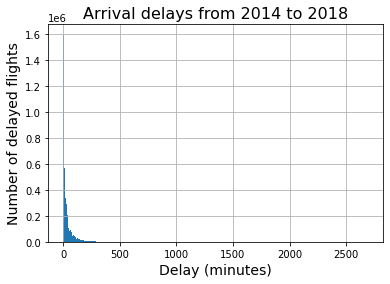

In [ ]:
fig = plt.figure(figsize=(12, 7))
delayed.hist(column='ARR_DELAY', bins=1000)
plt.title('Arrival delays from 2014 to 2018', fontsize=16)
plt.xlabel('Delay (minutes)', fontsize=14)
plt.ylabel('Number of delayed flights', fontsize=14)
plt.savefig('delay_hist.png')

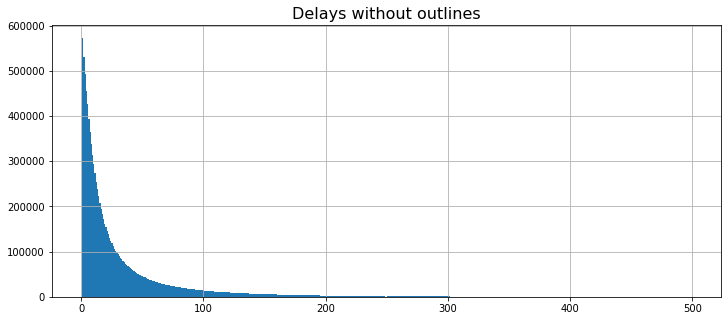

In [ ]:
#cut_outlines
delayed.query('ARR_DELAY < 500').hist(column='ARR_DELAY', bins=500, figsize=(12, 5))
plt.title('Delays without outlines', fontsize=16)
plt.savefig('delay_cut_outlines.png')

In some articles about this dataset researchers just analyse rows where delay time is more than 15 minutes. 

Text(0.5, 1.0, 'Cut first 15 minuts')

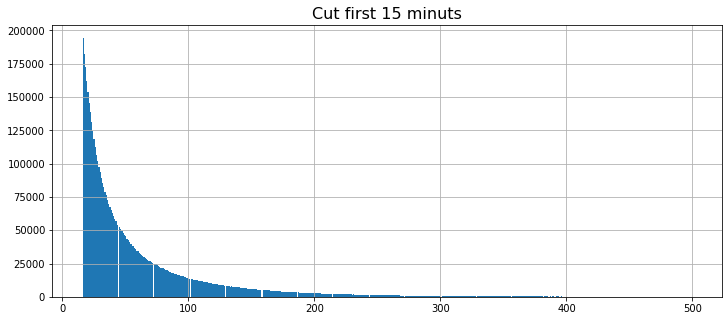

In [ ]:
#cut_15_mins
delayed.query('(ARR_DELAY < 500) & (ARR_DELAY > 15)').hist(column='ARR_DELAY', bins=500, figsize=(12, 5))
plt.title('Cut first 15 minuts', fontsize=16)

Even after cutting first 15 minuts and right outlines histogram doesn't looks like normal distribution

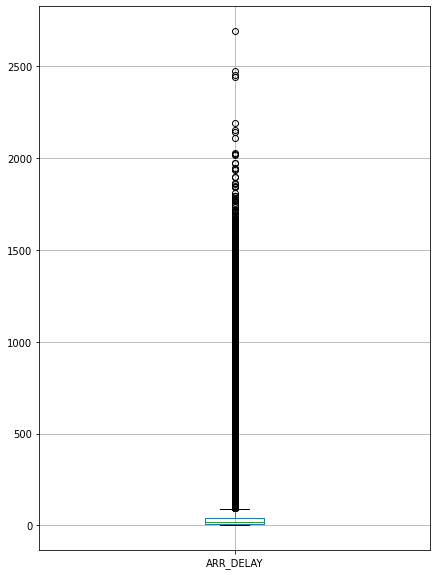

In [ ]:
fig = plt.figure(figsize=(7, 10))
delayed.boxplot(column='ARR_DELAY')
plt.savefig('delay_box.png')

In [ ]:
skewness_delay = delayed['ARR_DELAY'].skew()
print('skewness =', skewness_delay)
kurtosis_delay = delayed['ARR_DELAY'].kurtosis()
print('kurtosis =', kurtosis_delay)

skewness = 6.606914535477172
kurtosis = 85.25799602961428


The Skewness-Kurtosis is one of normality tests.  Skewness is positive when right "tail" of distribution is longer then left. Kurtoisis of normal distribution must be about 3. This test prouve us that distrubution is not normal. 
Histogram looks like exponential distribution and it seems to be true. The more is duration of delay, the less is probability of that.



Calculate average delay time and median delay time per:
    Year
    Quarter of year
    Month of year
    Week of year
    Day of week
    Carrier
    Origin
    Destination

FL_DATE_year
2014    32.5
2015    33.1
2016    34.8
2017    36.8
2018    37.7
Name: ARR_DELAY, dtype: float64
FL_DATE_year
2014    16.0
2015    15.0
2016    15.0
2017    16.0
2018    17.0
Name: ARR_DELAY, dtype: float64


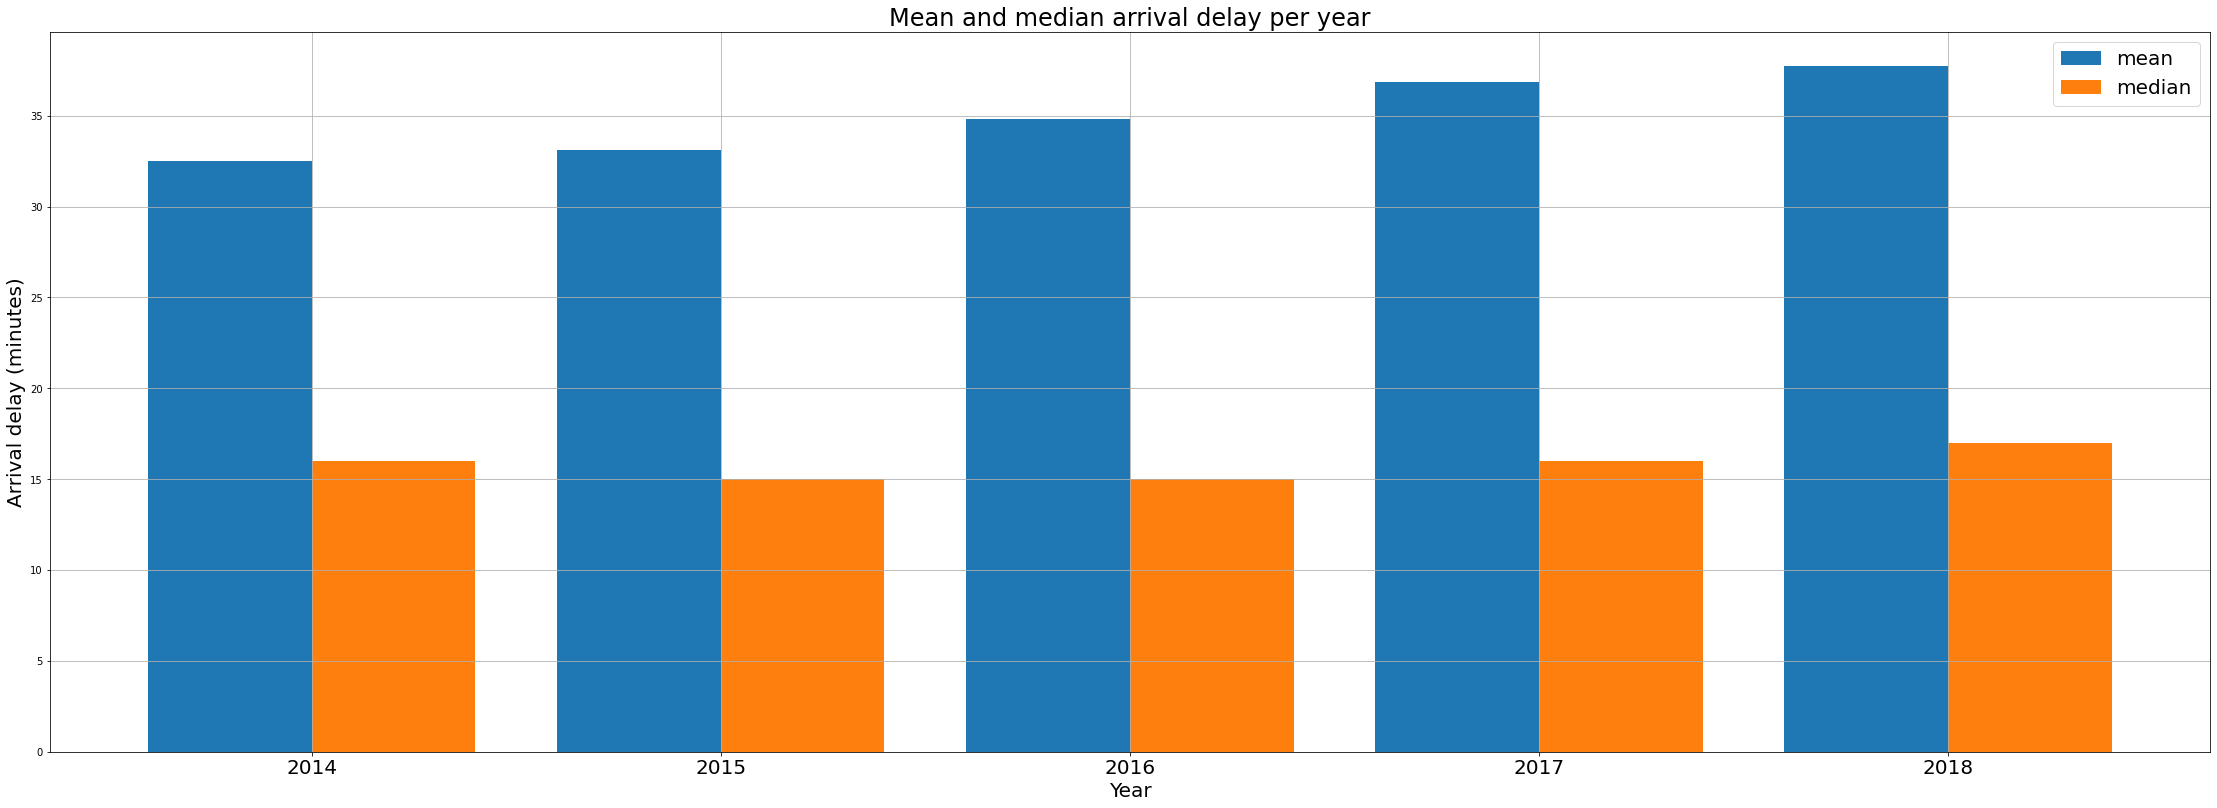

In [ ]:
#year
mean_year = delayed.groupby('FL_DATE_year').ARR_DELAY.mean()
median_year = delayed.groupby('FL_DATE_year').ARR_DELAY.median()

year = ['2014', '2015', '2016', '2017', '2018']
X = np.arange(1,6)

fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])

p1 = ax.bar(X - 0.20, mean_year, width = 0.40)
p2 = ax.bar(X + 0.20, median_year, width = 0.40)
plt.xticks(X, year, fontsize=20)
ax.grid()
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Arrival delay (minutes)', fontsize = 20)
ax.set_title('Mean and median arrival delay per year', fontsize = 24)
ax.legend(labels=['mean', 'median'], fontsize = 20)

plt.savefig('delay_yearly.png', bbox_inches='tight')
print(mean_year.round(1))
print(median_year)


Mean arrival delay slightly increases every year, it might be caused by increase of flights. The difference between mean and median in 2014 is the smallest.  

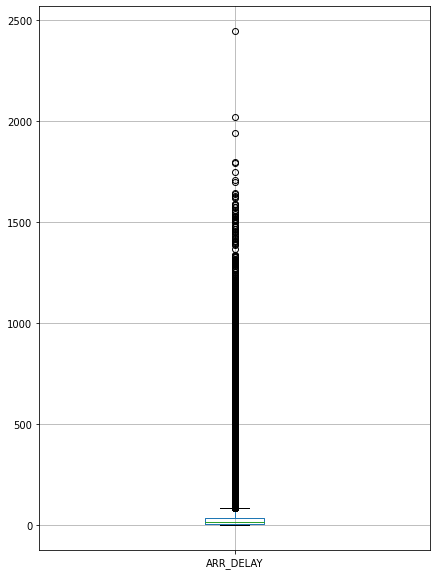

In [ ]:
delayed.query('FL_DATE_year == 2014').boxplot(column='ARR_DELAY', figsize=(7, 10))


We can see on the boxplot what outlines "tale" is shorter in 2014 than in full dataset

FL_DATE_quarter
1    34.6
2    36.1
3    36.8
4    32.3
Name: ARR_DELAY, dtype: float64
FL_DATE_quarter
1    16.0
2    16.0
3    16.0
4    14.0
Name: ARR_DELAY, dtype: float64


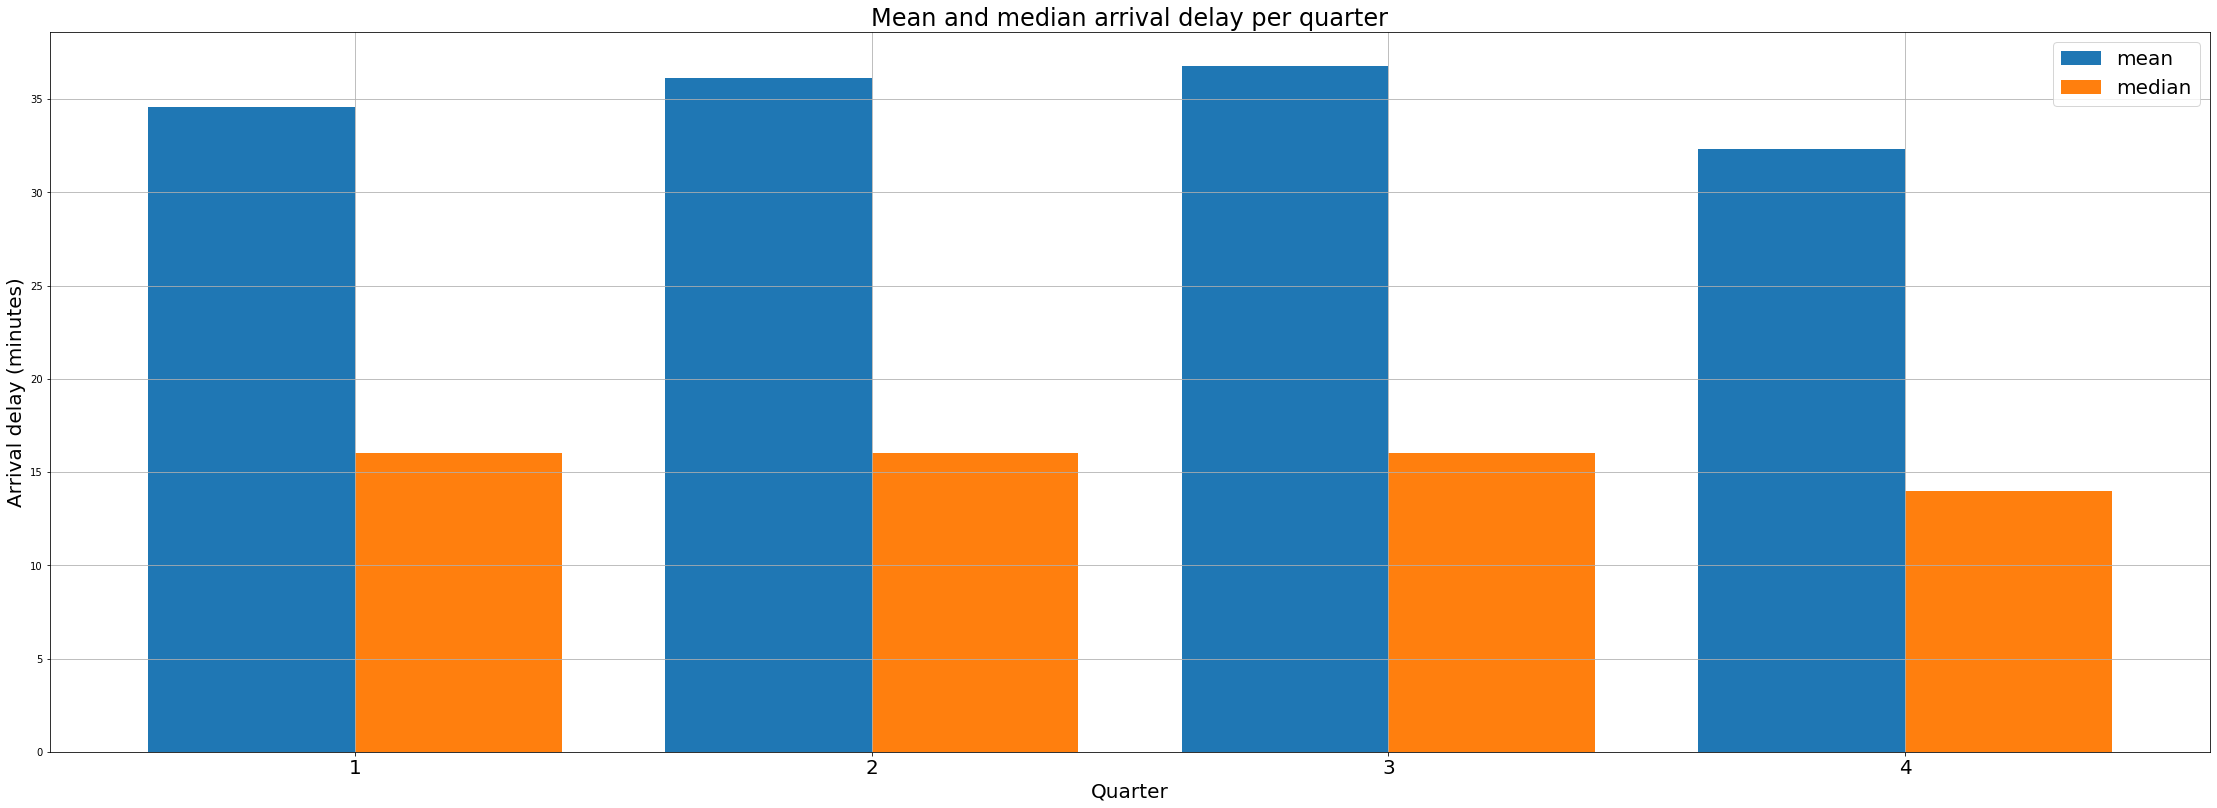

In [ ]:
#quarter
mean_quarter = delayed.groupby('FL_DATE_quarter').ARR_DELAY.mean()
median_quarter = delayed.groupby('FL_DATE_quarter').ARR_DELAY.median()

X = np.arange(1,5)

fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])

p1 = ax.bar(X-0.20, mean_quarter, width=0.40)
p2 = ax.bar(X+0.20, median_quarter, width=0.40)
plt.xticks(X, fontsize=20)

ax.grid()
ax.set_xlabel('Quarter', fontsize = 20)
ax.set_ylabel('Arrival delay (minutes)', fontsize = 20)
ax.set_title('Mean and median arrival delay per quarter', fontsize = 24)
ax.legend(labels=['mean', 'median'], fontsize = 20)

plt.savefig('delay_quarter.png', bbox_inches='tight')
print(mean_quarter.round(1))
print(median_quarter)

Here we can see what the longest mean arrival delay is in summer time. It might be related with summer increase of flights. More flights, longer delays.

FL_DATE_month
1     36.9
2     35.2
3     31.8
4     33.5
5     35.3
6     39.0
7     39.4
8     38.1
9     31.2
10    30.0
11    31.0
12    35.5
Name: ARR_DELAY, dtype: float64
FL_DATE_month
1     17.0
2     16.0
3     14.0
4     15.0
5     16.0
6     18.0
7     18.0
8     17.0
9     13.0
10    13.0
11    14.0
12    16.0
Name: ARR_DELAY, dtype: float64


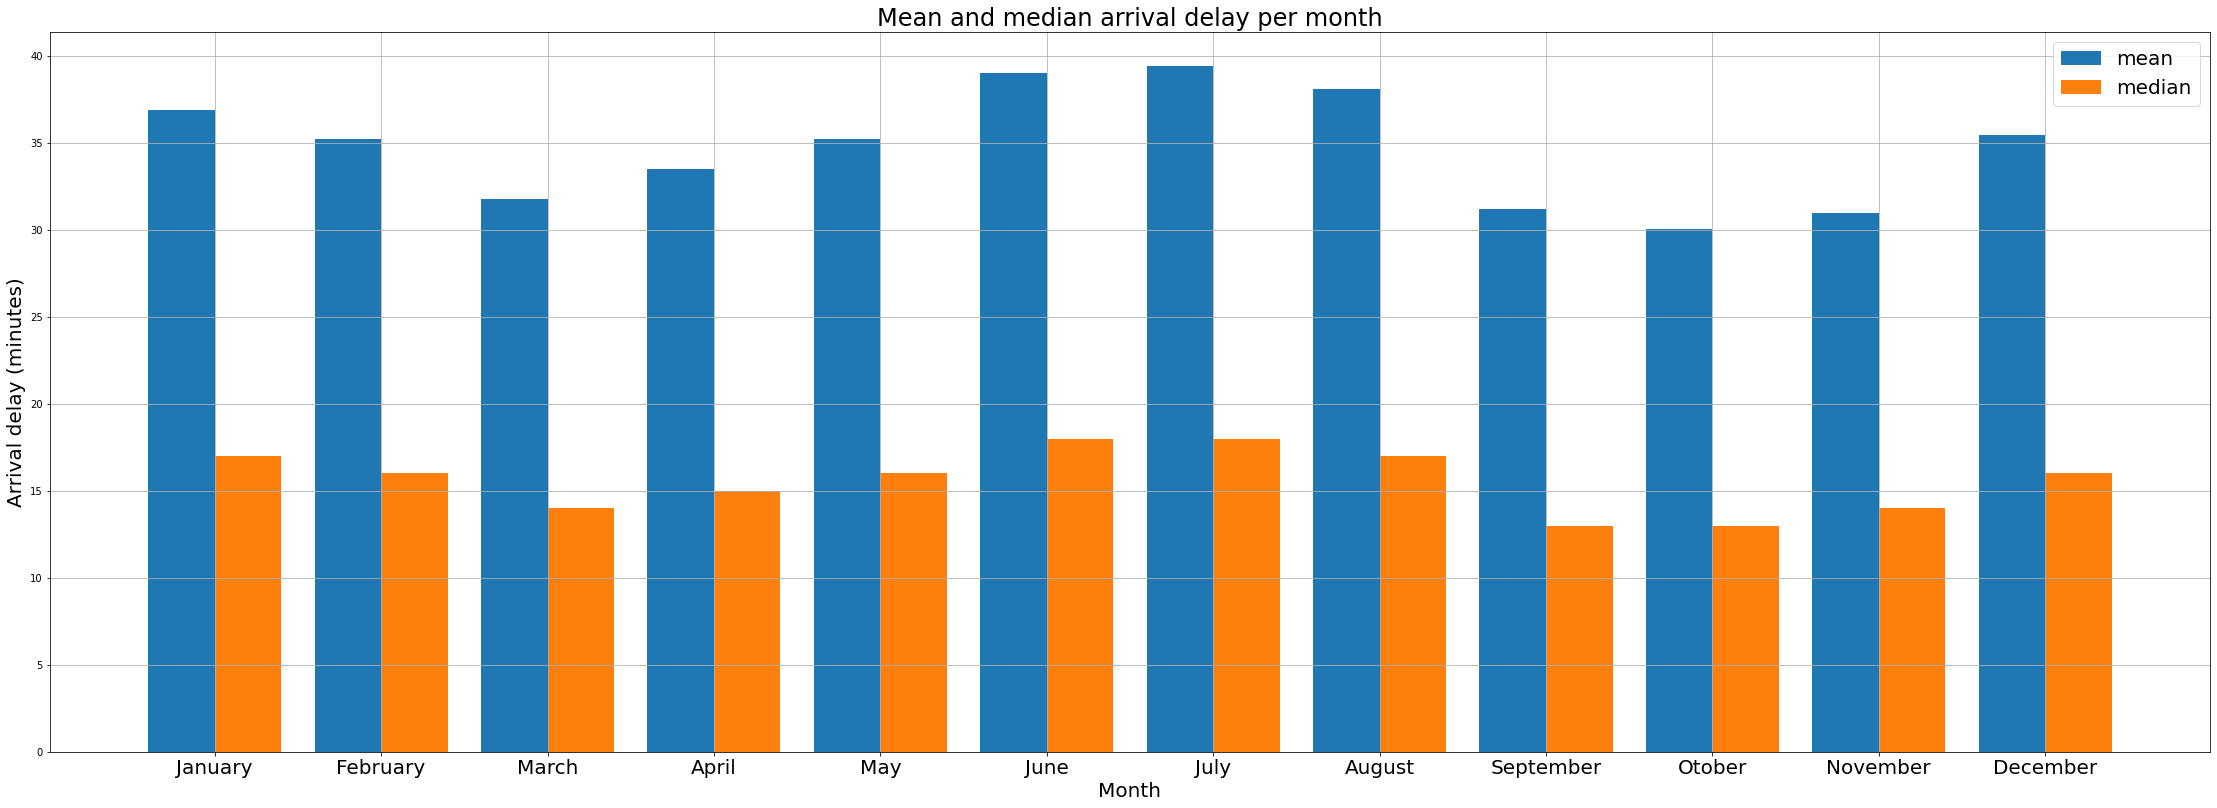

In [ ]:
#per month
mean_month = delayed.groupby('FL_DATE_month').ARR_DELAY.mean()
median_month = delayed.groupby('FL_DATE_month').ARR_DELAY.median()


month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'Otober', 'November', 'December']
X = np.arange(1,13)

fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])

p1 = ax.bar(X - 0.20, mean_month, width = 0.40)
p2 = ax.bar(X + 0.20, median_month, width = 0.40)
plt.xticks(X, month, fontsize = 20)

ax.grid()
ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('Arrival delay (minutes)', fontsize = 20)
ax.set_title('Mean and median arrival delay per month', fontsize = 24)
ax.legend(labels=['mean', 'median'], fontsize = 20)

plt.savefig('delay_monthly.png', bbox_inches='tight')

print(mean_month.round(1))
print(median_month)

The hypothesis from previous plot is graphically confirmed - the longest delays are in the vacations period: June, July, August and in January

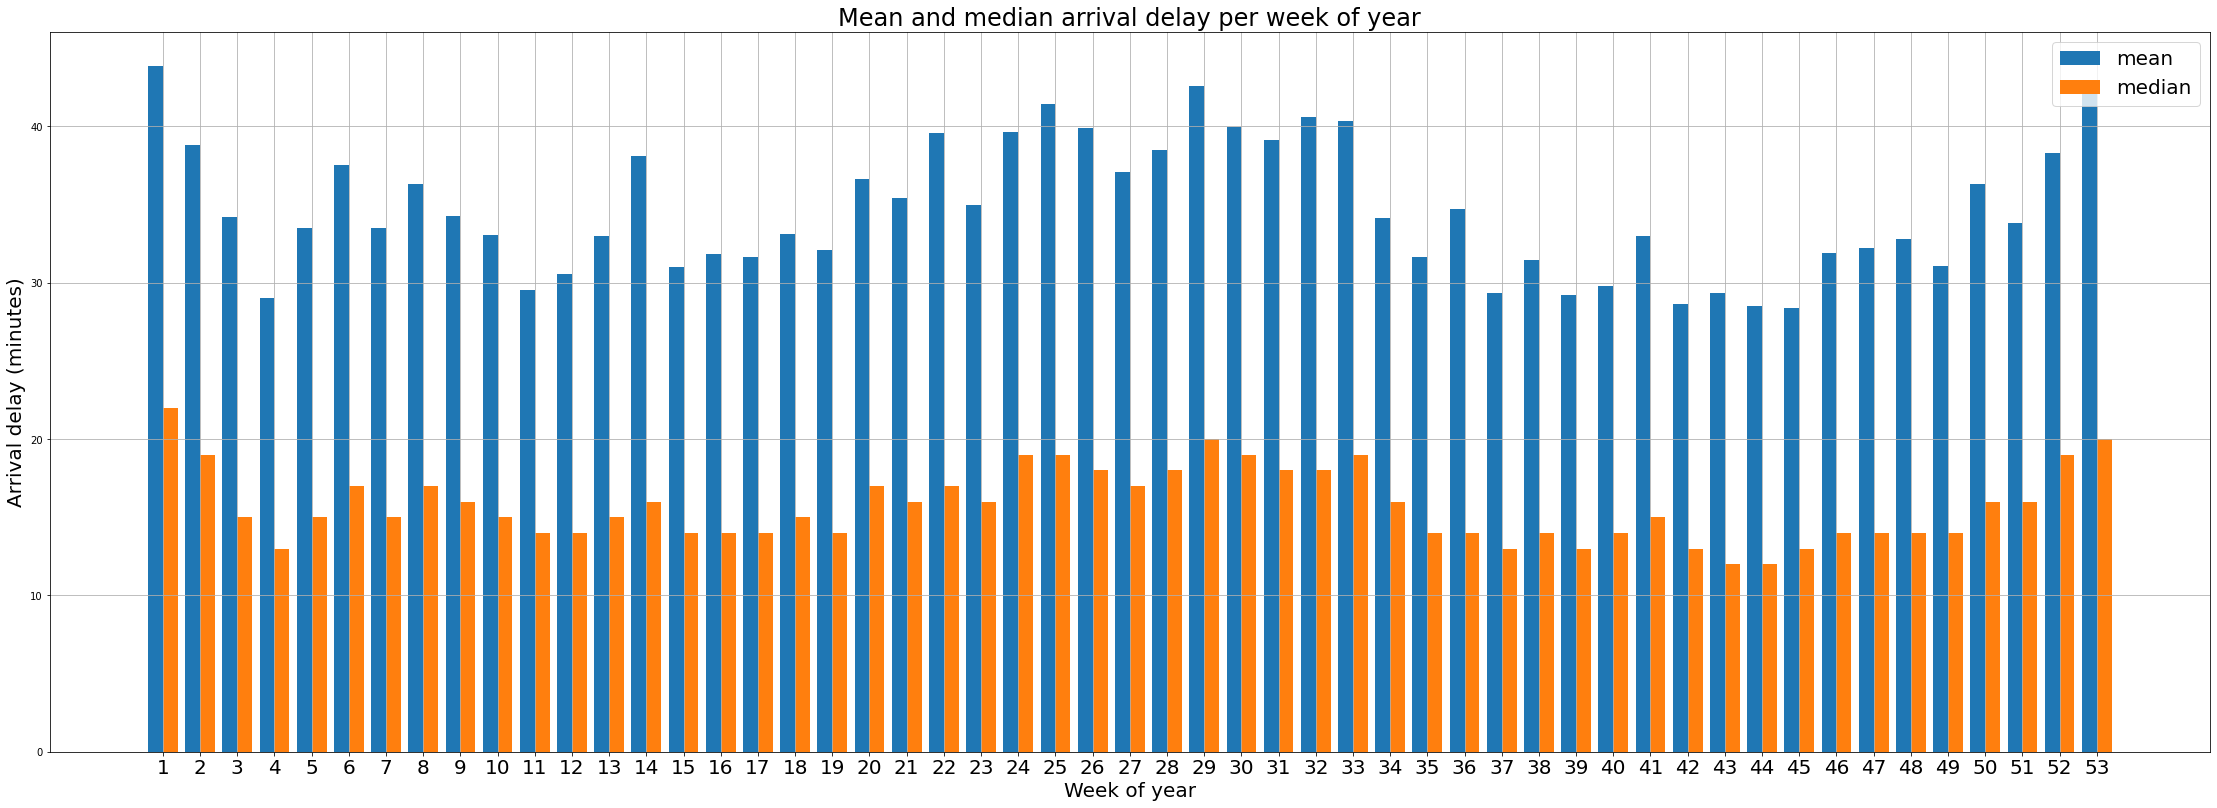

In [ ]:
#Week of year
mean_week = delayed.groupby('FL_DATE_weekofyear').ARR_DELAY.mean()
median_week = delayed.groupby('FL_DATE_weekofyear').ARR_DELAY.median()

X = np.arange(1,54)

fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])

p1 = ax.bar(X - 0.20, mean_week, width = 0.40)
p2 = ax.bar(X + 0.20, median_week, width = 0.40)
plt.xticks(X, fontsize = 20)
ax.grid()
ax.set_xlabel('Week of year', fontsize = 20)
ax.set_ylabel('Arrival delay (minutes)', fontsize = 20)
ax.set_title('Mean and median arrival delay per week of year', fontsize = 24)
ax.legend(labels=['mean', 'median'], fontsize = 20)

plt.savefig('delay_week.png', bbox_inches='tight')

FL_DATE_weekday
Friday       35.4
Monday       36.8
Saturday     33.7
Sunday       35.1
Thursday     35.1
Tuesday      34.8
Wednesday    33.7
Name: ARR_DELAY, dtype: float64
FL_DATE_weekday
Friday       16.0
Monday       16.0
Saturday     15.0
Sunday       16.0
Thursday     16.0
Tuesday      15.0
Wednesday    15.0
Name: ARR_DELAY, dtype: float64


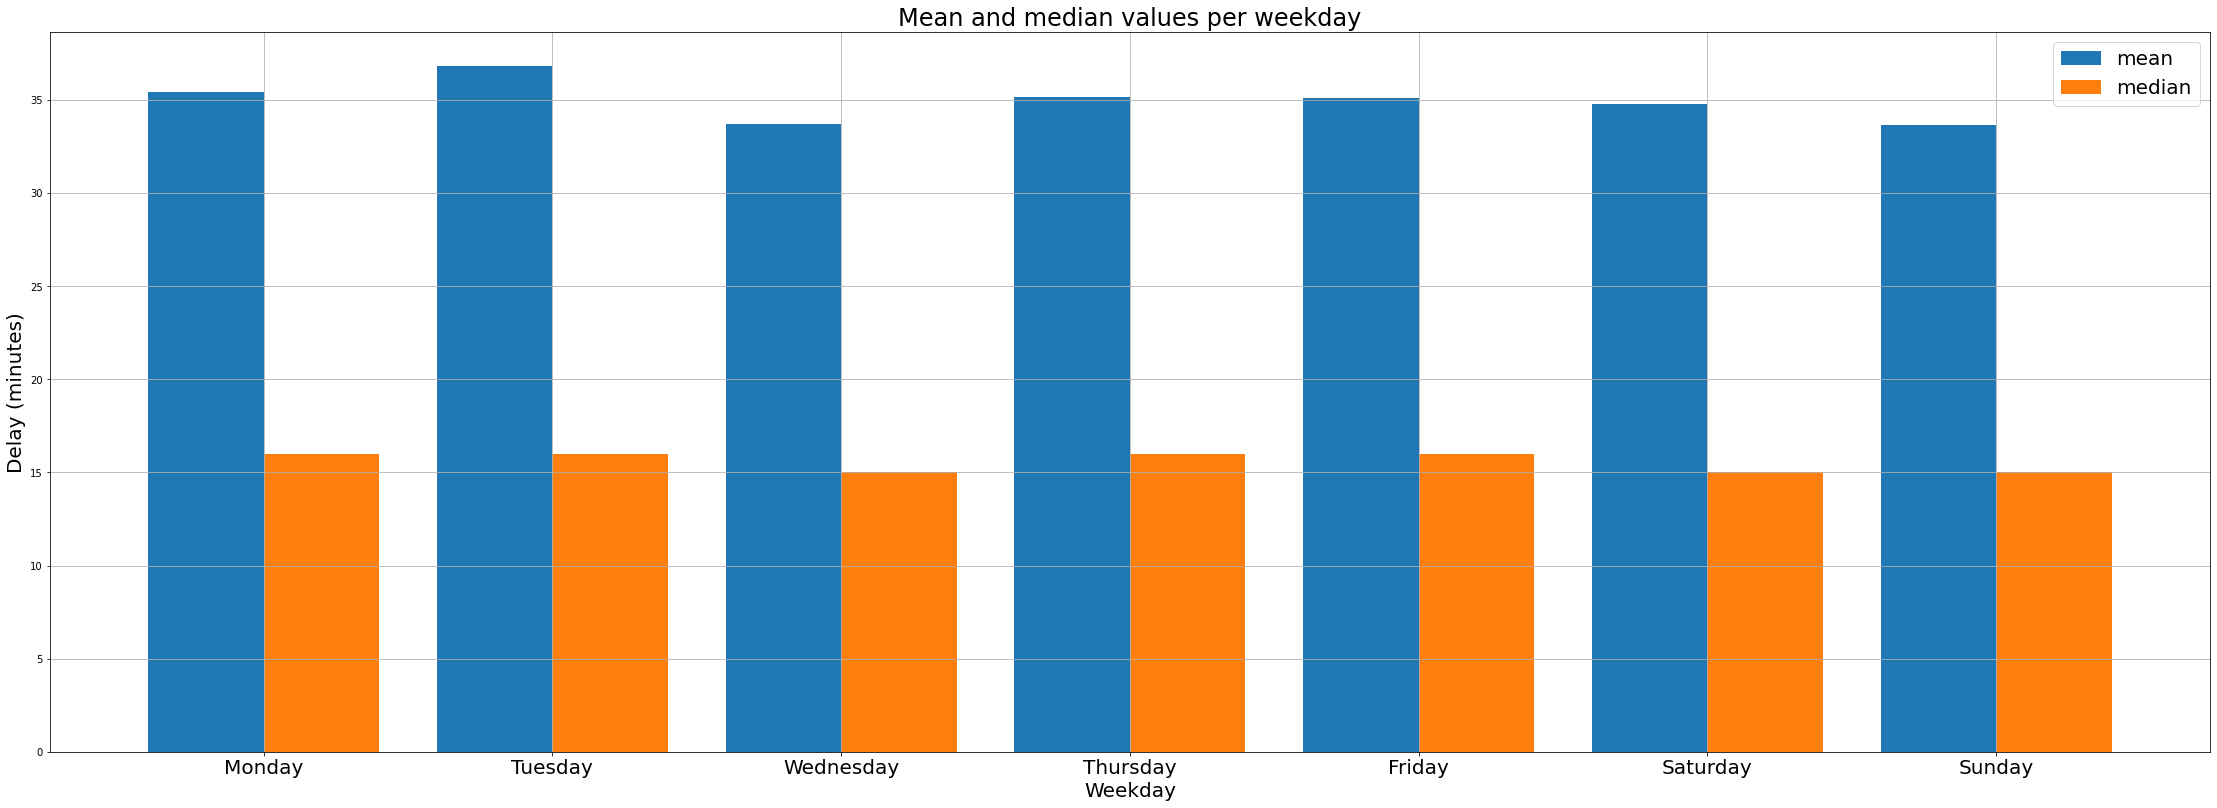

In [ ]:
#Day of week 
mean_weekday = delayed.groupby('FL_DATE_weekday').ARR_DELAY.mean()
median_weekday = delayed.groupby('FL_DATE_weekday').ARR_DELAY.median()

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
X = np.arange(1,8)

fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])

p1 = ax.bar(X - 0.20, mean_weekday, width = 0.40)
p2 = ax.bar(X + 0.20, median_weekday, width = 0.40)

plt.xticks(X, weekday, fontsize = 20)
ax.grid()
ax.set_xlabel('Weekday', fontsize = 20)
ax.set_ylabel('Delay (minutes)', fontsize = 20)
ax.set_title('Mean and median values per weekday', fontsize = 24)
ax.legend(labels=['mean', 'median'], fontsize = 20)

plt.savefig('delay_weekday.png', bbox_inches='tight')

print(mean_weekday.round(1))
print(median_weekday)

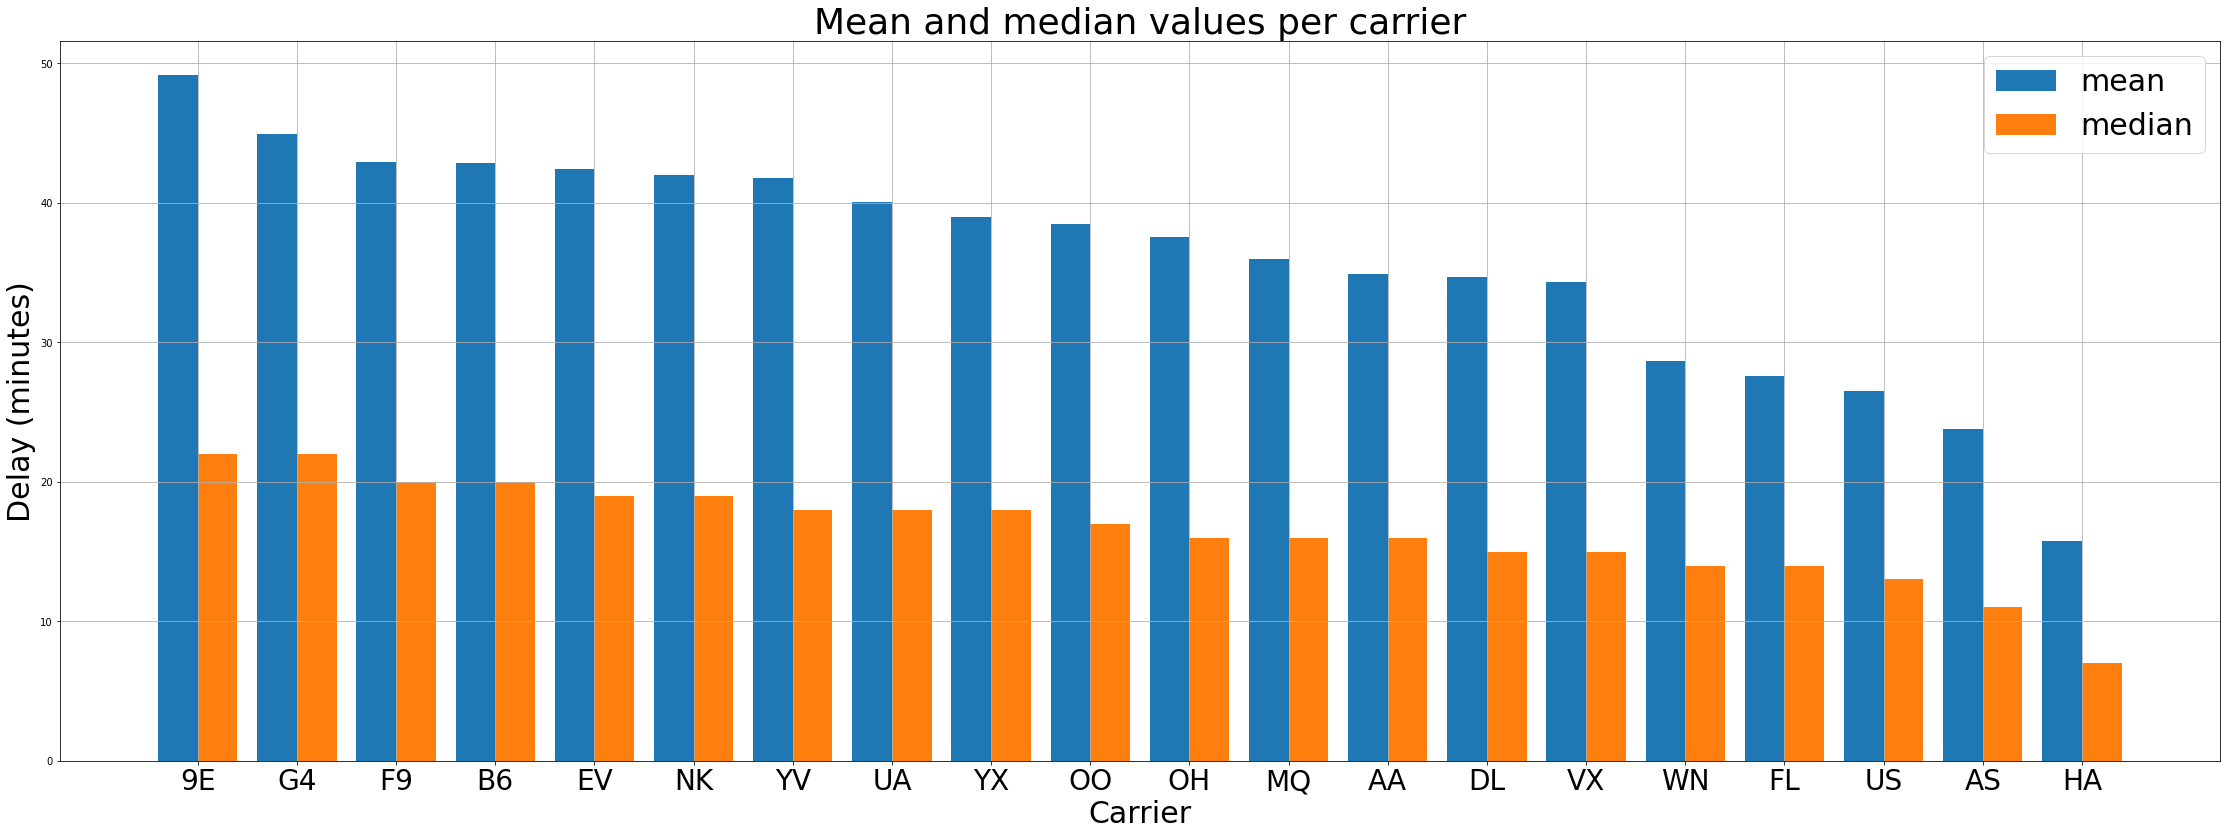

In [ ]:
#Carrier
mean_carrier = delayed.groupby('OP_CARRIER').ARR_DELAY.mean().sort_values(ascending=False)
median_carrier = delayed.groupby('OP_CARRIER').ARR_DELAY.median().sort_values(ascending=False)

carrier_list = mean_carrier.reset_index()['OP_CARRIER'].to_list()

    
X = np.arange(1,(len(carrier_list)+1))

fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])

p1 = ax.bar(X - 0.20, mean_carrier, width = 0.40)
p2 = ax.bar(X + 0.20, median_carrier, width = 0.40)
ax.grid()
plt.xticks(X, carrier_list, fontsize = 28)

ax.set_xlabel('Carrier', fontsize = 30)
ax.set_ylabel('Delay (minutes)', fontsize = 30)
ax.set_title('Mean and median values per carrier', fontsize = 36)
ax.legend(labels=['mean', 'median'], fontsize = 30)

fig.savefig('delay_carrier.png', bbox_inches='tight')

In [69]:
#origin
mean_origin = delayed.groupby('ORIGIN').ARR_DELAY.mean().sort_values(ascending=False)
median_origin = delayed.groupby('ORIGIN').ARR_DELAY.median().sort_values(ascending=False)
mean_origin.sort_values()

ORIGIN
ITO    14.104947
HNL    19.230338
AKN    19.553030
KOA    20.824173
WYS    21.236239
Name: ARR_DELAY, dtype: float64

There are too much airports to clearly show them on the plot, but I can look at top-5 longest mean delay and top-5 shortest

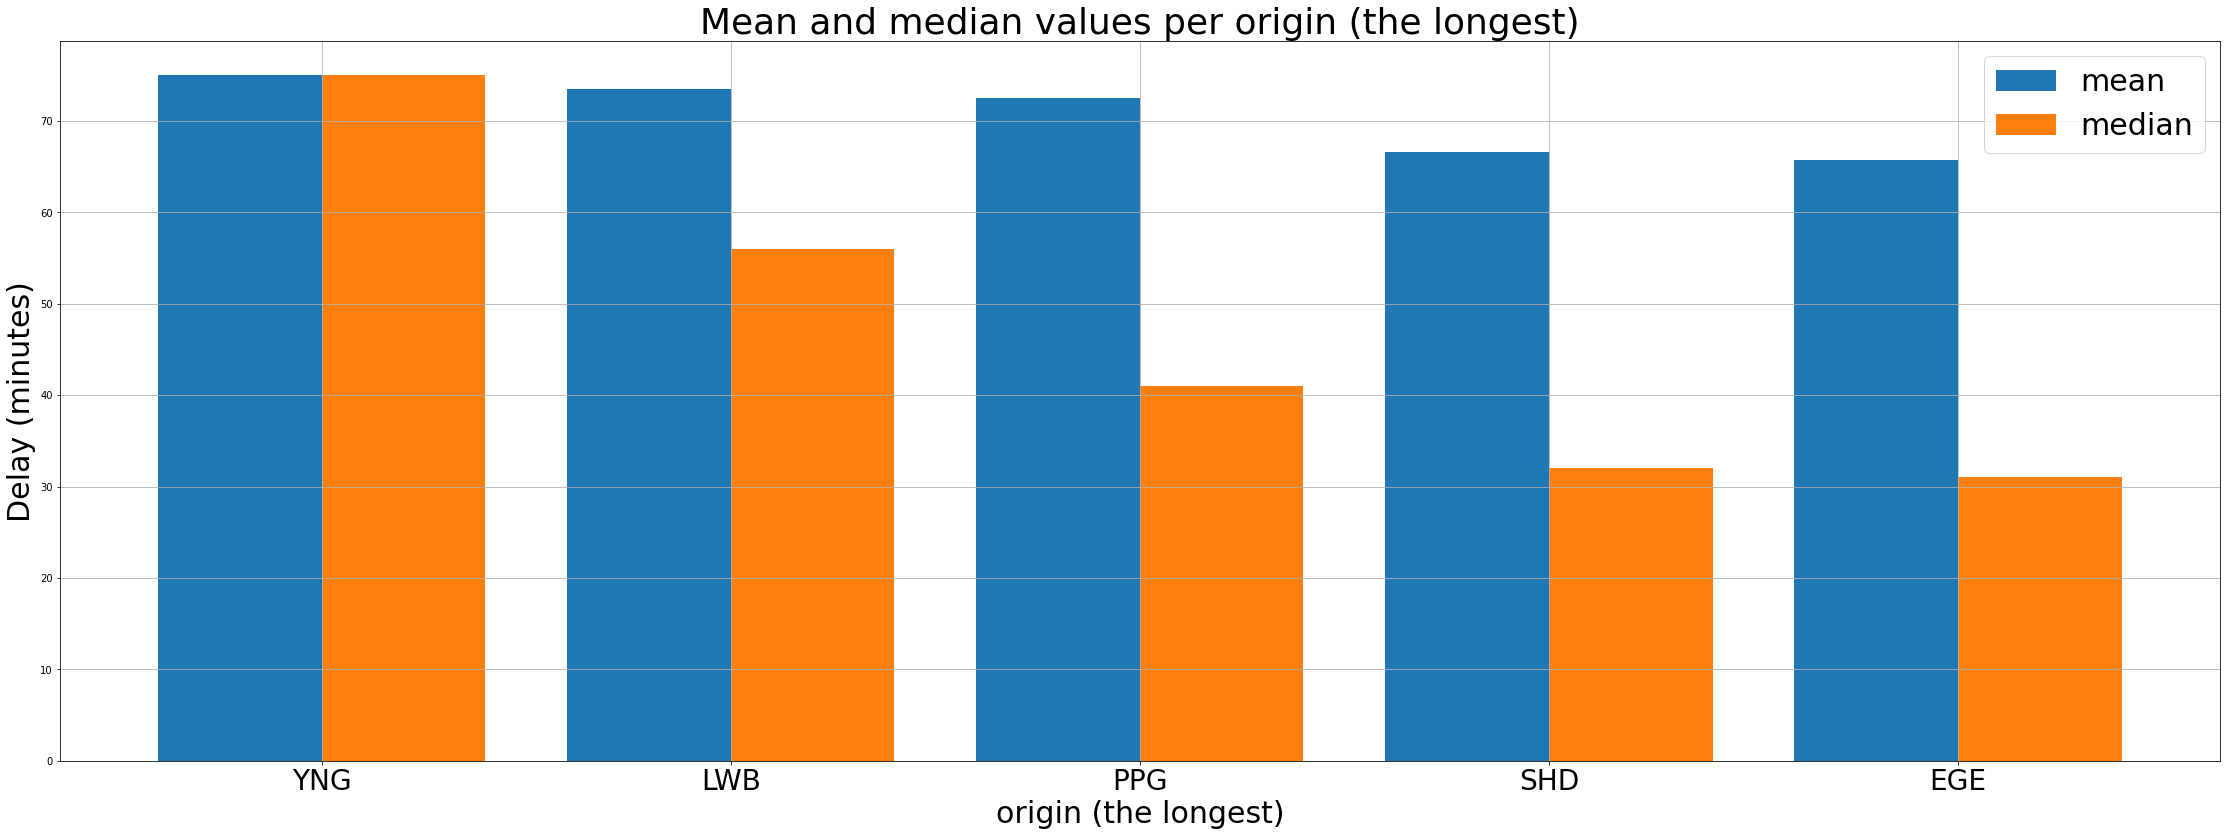

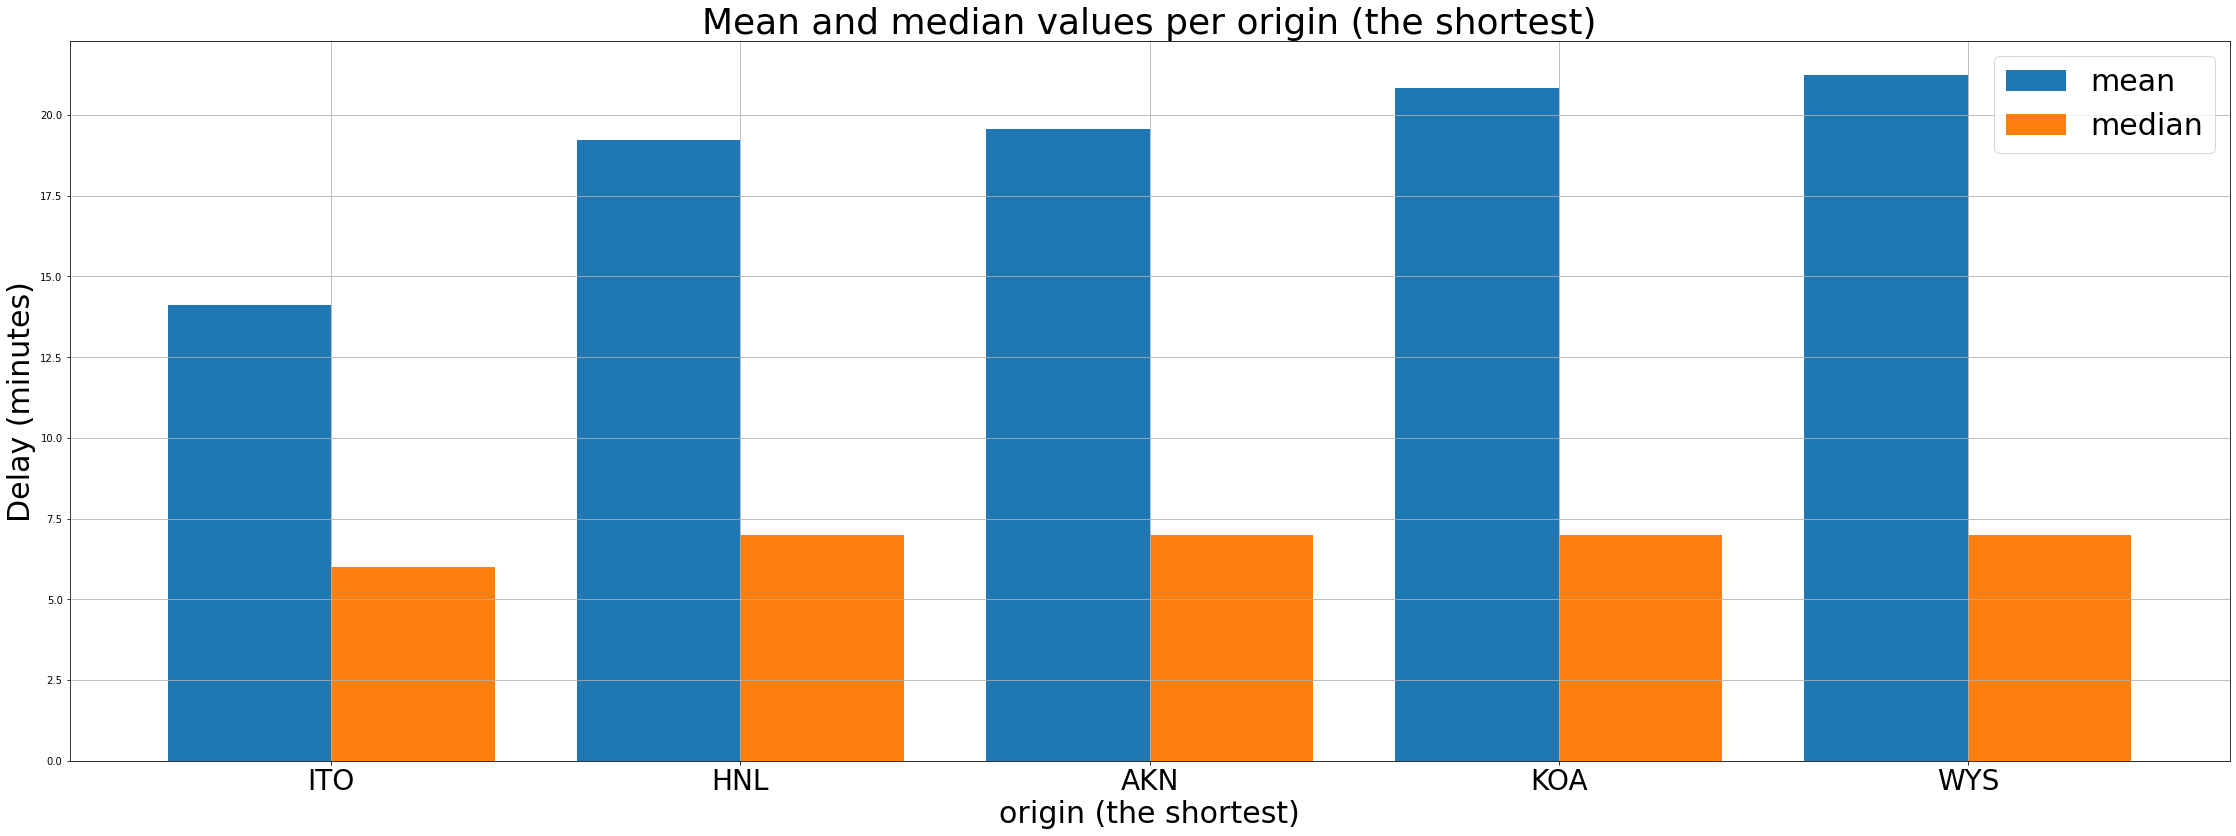

In [70]:
mean_origin_long = mean_origin[:5]
mean_origin_short = mean_origin.sort_values()[:5]
median_origin_long = median_origin[:5]
median_origin_short = median_origin.sort_values()[:5]

origin_list_long = mean_origin_long.reset_index()['ORIGIN'].to_list()
origin_list_short = mean_origin_short.reset_index()['ORIGIN'].to_list()

def draw_plot(mean_val, median_val, x_ticks, title):
    X = np.arange(1,(len(x_ticks)+1))

    fig = plt.figure(figsize=(30, 10))
    ax = fig.add_axes([0,0,1,1])

    p1 = ax.bar(X - 0.20, mean_val, width = 0.40)
    p2 = ax.bar(X + 0.20, median_val, width = 0.40)
    ax.grid()
    plt.xticks(X, x_ticks, fontsize = 28)

    ax.set_xlabel(title, fontsize = 30)
    ax.set_ylabel('Delay (minutes)', fontsize = 30)
    ax.set_title('Mean and median values per '+title, fontsize = 36)
    ax.legend(labels=['mean', 'median'], fontsize = 30)
    fig.savefig(title+'.png', bbox_inches='tight')
    plt.show()
    

draw_plot(mean_origin_long, median_origin_long, origin_list_long, 'origin (the longest)')
draw_plot(mean_origin_short, median_origin_short, origin_list_short, 'origin (the shortest)')

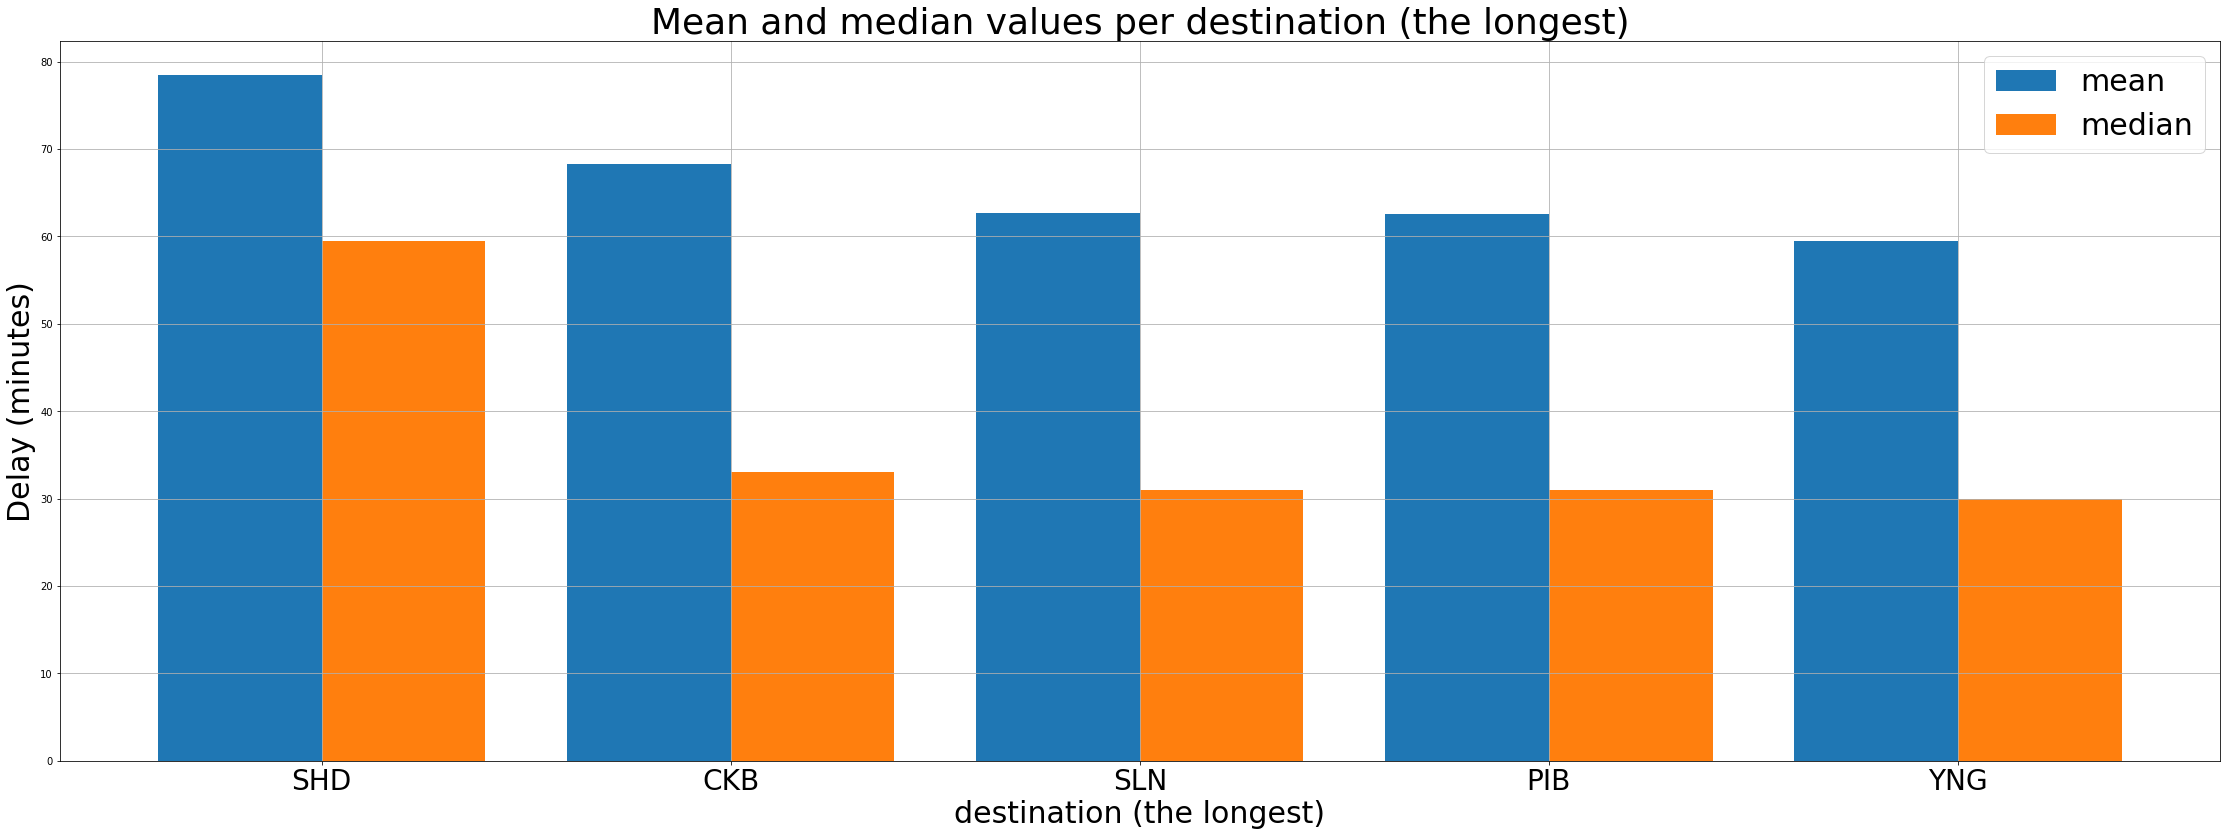

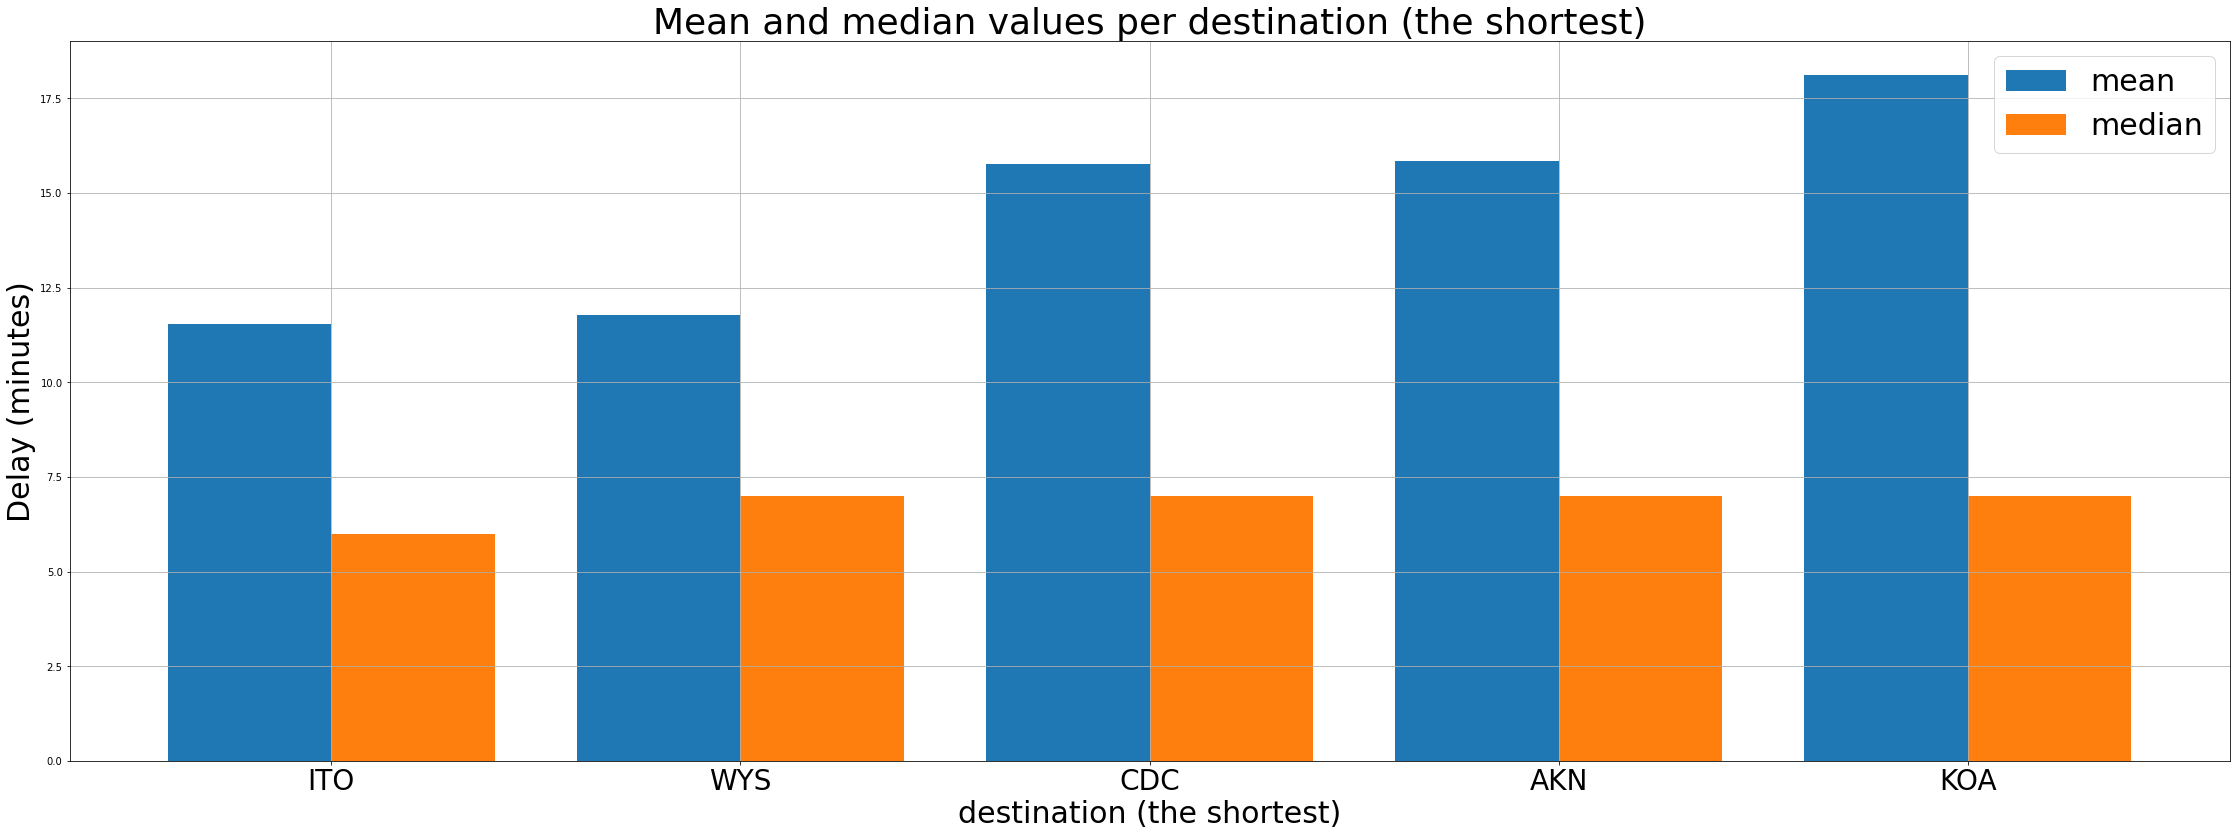

In [71]:
#Destination
mean_destination = delayed.groupby('DEST').ARR_DELAY.mean().sort_values(ascending=False)
median_destination = delayed.groupby('DEST').ARR_DELAY.median().sort_values(ascending=False)
mean_destination_long = mean_destination[:5]
mean_destination_short = mean_destination.sort_values()[:5]
median_destination_long = median_destination[:5]
median_destination_short = median_destination.sort_values()[:5]

destination_list_long = mean_destination_long.reset_index()['DEST'].to_list()
destination_list_short = mean_destination_short.reset_index()['DEST'].to_list()

draw_plot(mean_destination_long, median_destination_long, destination_list_long, 'destination (the longest)')
draw_plot(mean_destination_short, median_destination_short, destination_list_short, 'destination (the shortest)')